# Logistic Regression: banking Marketing Campaign

## 1. Import modules, data download and data frame inspection! 

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### 1.1. Data download 

In [2]:
data_url='https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
data_df=pd.read_csv(data_url, sep=';')

### 1.2. Data inspection 

In [3]:
data_df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- There are 21 columns with 11 categorical and 10 numerical features! 
- No missing values across all features! 

### 1.3. Test-train split 

In [8]:
training_df, testing_df=train_test_split(data_df, test_size=0.25) 

## 2. EDA 
### 2.1. Baseline model performance

In [9]:
# inspecting yes/no column 

training_df['y'].value_counts()

y
no     27390
yes     3501
Name: count, dtype: int64

In [14]:
model_accuracy = (training_df['y'].value_counts()['no']/len(training_df['y']))*100
print(f"Accuracy of constant 'no' model: {model_accuracy:.1f}%")

Accuracy of constant 'no' model: 88.7%


### 2.2. Data cleanup 
#### 2.2.1. Categorical feature inspection

In [17]:
categorical_features=['y','job','education','marital','default','housing','loan','contact','poutcome','day_of_week','month']



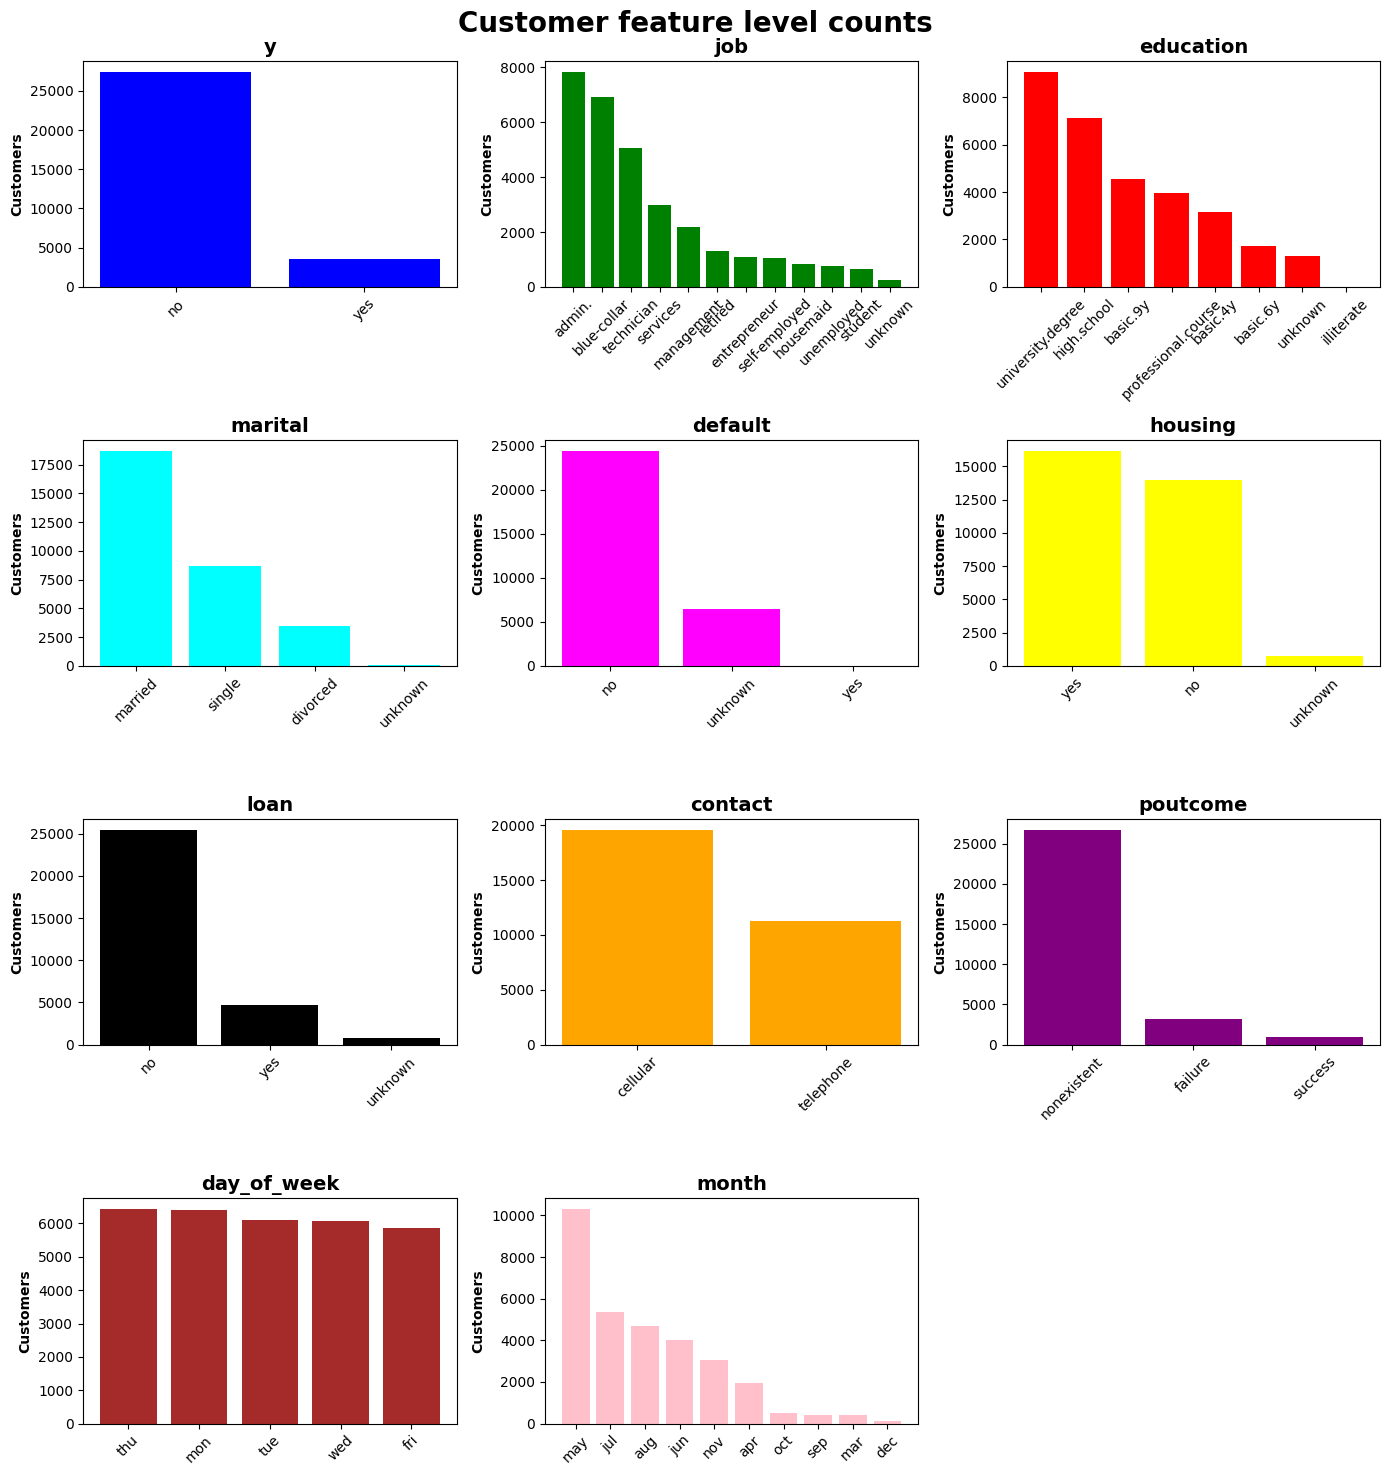

In [37]:
fig, axs=plt.subplots(4,3, figsize=(14,15))
axs=axs.flatten()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']

axs[11].remove()
fig.suptitle('Customer feature level counts', fontsize=20, fontweight='bold')

for i, feature in enumerate(categorical_features):
    if i == 11:
        continue 
    # Plot neighborhood group level counts
    level_counts=training_df[feature].value_counts()

    axs[i].set_title(feature, fontsize=14, fontweight='bold')
    axs[i].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color=colors[i % len(colors)])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_ylabel('Customers', fontweight='bold')

fig.tight_layout()
fig.show()

#### 2.2.2. Numerical feature inspection 

In [38]:
numerical_features=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

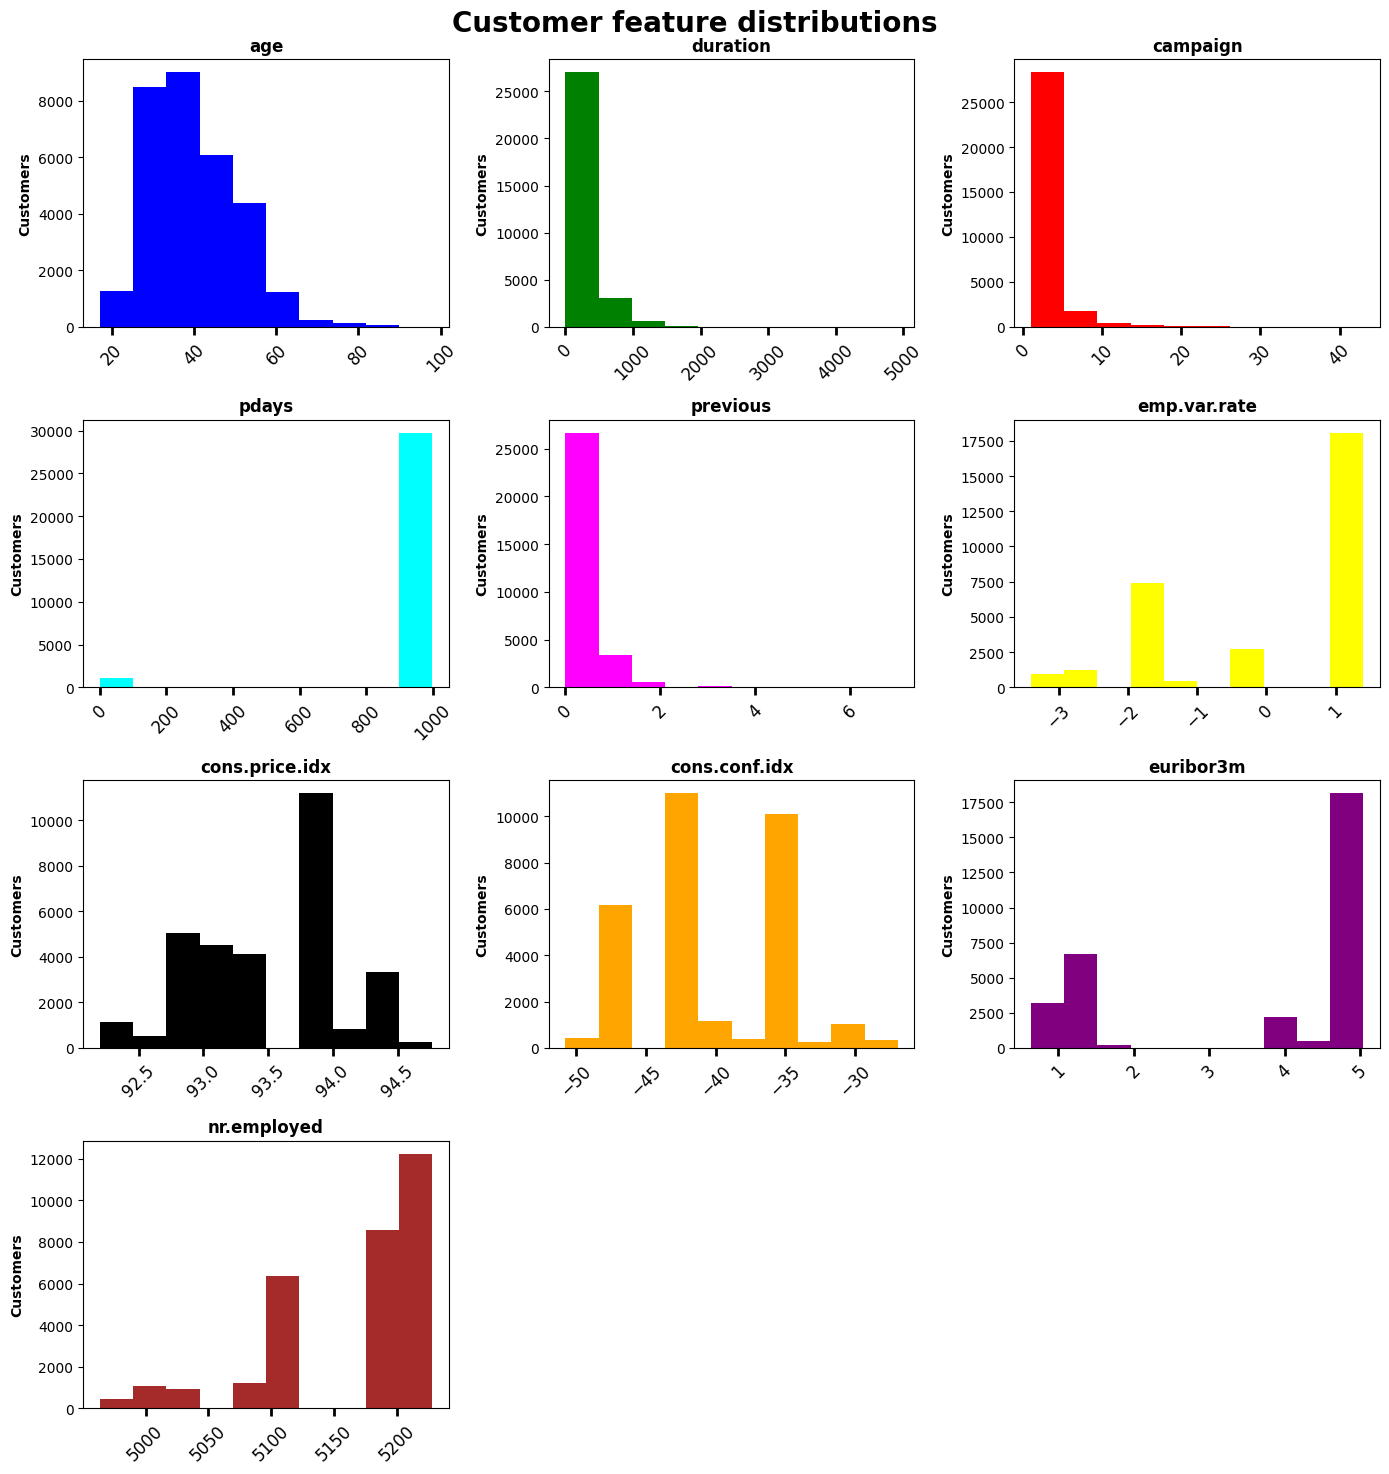

In [47]:
fig, axs=plt.subplots(4,3, figsize=(14,15))
axs=axs.flatten()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
axs[10].remove()
axs[11].remove()
fig.suptitle('Customer feature distributions', fontsize=20, fontweight='bold')

for i, feature in enumerate(numerical_features):
    if i == 10 and 11:
        continue 
    axs[i].set_title(feature, fontweight='bold')
    axs[i].hist(training_df[feature], color=colors[i % len(colors)])
    axs[i].tick_params(axis='x', length=6, width=2, labelsize=12, labelrotation=45)
    axs[i].set_ylabel('Customers', fontweight='bold')

fig.tight_layout()
fig.show()